RANDOM FOREST ALGORITHM FOR DIABETES DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
# STEP-1 LOAD DATASET
data = pd.read_csv("diabetes.csv")

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
#STEP-2 TRAIN RANDOM FOREST MODEL
rf = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,          # let trees grow fully
    random_state=42,
    n_jobs=-1                # use all CPU cores
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

Accuracy: 0.7207792207792207

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



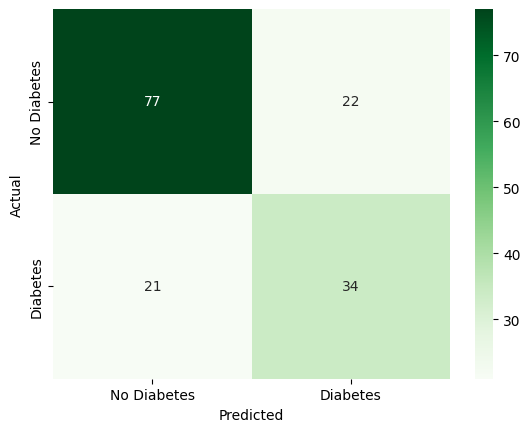

In [5]:
# STEP-3 Predictions & Evaluation
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Diabetes","Diabetes"],
            yticklabels=["No Diabetes","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\DHAVAL\AppData\Local\Temp\ipykernel_14440\1659769654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


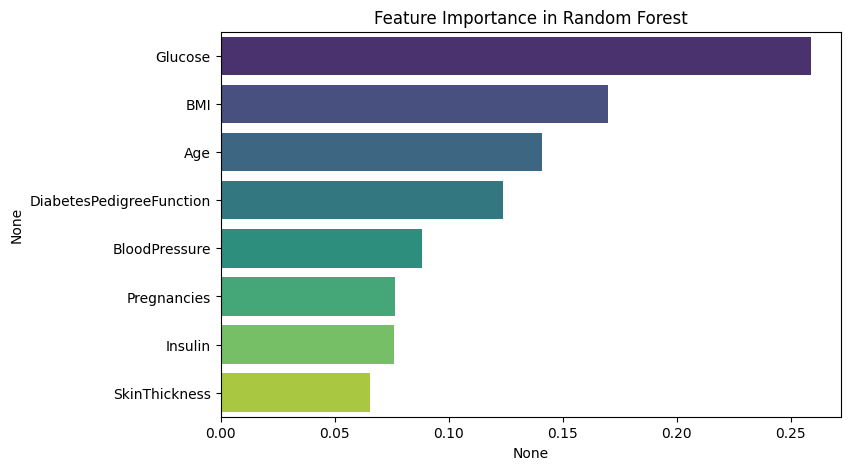

In [6]:
# STEP-4 Feature Importance
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.show()

WHY HYPER-PARAMETER TUNING? “On small, imbalanced datasets, a single tuned Decision Tree can sometimes outperform a default Random Forest. But with hyperparameter tuning and balanced class weights, Random Forest usually generalizes better.”

In [ ]:
# TRYING HYPERPARAMETER TUNING FOR THE RF
# 1. NUMBER OF TREES
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

for n in [50, 100, 200, 300, 500]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    print(f"n_estimators={n}, CV Accuracy={scores.mean():.4f}")


n_estimators=50, CV Accuracy=0.7769
n_estimators=100, CV Accuracy=0.7721
n_estimators=200, CV Accuracy=0.7769
n_estimators=300, CV Accuracy=0.7737
n_estimators=500, CV Accuracy=0.7769


In [9]:
# 2. TREE DEPTH AND SPLITING
for depth in [None, 5, 10, 15]:
    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=depth,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    print(f"max_depth={depth}, CV Accuracy={scores.mean():.4f}")


max_depth=None, CV Accuracy=0.7704
max_depth=5, CV Accuracy=0.7688
max_depth=10, CV Accuracy=0.7704
max_depth=15, CV Accuracy=0.7704


In [ ]:
#3: Feature Selection & Class Weight
for feat in ['sqrt', 'log2']:
    for weight in [None, 'balanced']:
        rf = RandomForestClassifier(
            n_estimators=300,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features=feat,
            class_weight=weight,
            random_state=42,
            n_jobs=-1
        )
        scores = cross_val_score(rf, X_train, y_train, cv=5)
        print(f"max_features={feat}, class_weight={weight}, CV Accuracy={scores.mean():.4f}")


max_features=sqrt, class_weight=None, CV Accuracy=0.7704
max_features=sqrt, class_weight=balanced, CV Accuracy=0.7655
max_features=log2, class_weight=None, CV Accuracy=0.7769
max_features=log2, class_weight=balanced, CV Accuracy=0.7622


In [18]:
# from above 3 steps, taking the best values

best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Final Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In this project, we applied a Random Forest Classifier to the Diabetes Prediction dataset as an improvement over a single Decision Tree. While the Decision Tree provided interpretability, it was prone to overfitting and showed limited generalization. By contrast, Random Forest — an ensemble of multiple decision trees — delivered higher stability, robustness, and predictive accuracy after hyperparameter tuning.

The feature importance analysis highlighted Glucose, BMI, and Age as the most critical predictors of diabetes, aligning with medical intuition. Moreover, Random Forest improved the Recall score, which is especially important in healthcare settings where correctly identifying patients with diabetes is more critical than minimizing false positives.

Overall, this project demonstrates that Random Forest is a more reliable and generalizable model for medical classification tasks compared to a single Decision Tree, though at the cost of reduced interpretability.